# Day 11 Action item
## I'll work today on classifying MNIST digits again but with different CNN acrhitectures.

### As usual we'll import used libraries

In [44]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import KFold
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import RMSprop,Adam,SGD
%matplotlib inline

### Read the dataset from keras

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print('Train data shape, data={},labels={}'.format(x_train.shape,y_train.shape))
print('Test data shape, data={},labels={}'.format(x_test.shape,y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
Train data shape, data=(60000, 28, 28),labels=(60000,)
Test data shape, data=(10000, 28, 28),labels=(10000,)


### preview some images

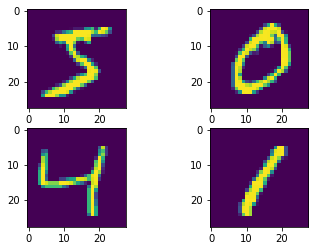

In [7]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(x_train[0])
axarr[0,1].imshow(x_train[1])
axarr[1,0].imshow(x_train[2])
axarr[1,1].imshow(x_train[3])
plt.show()

### reshape dataset to have a single color channel "gray scale"

In [8]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

### One hot encode the data, 10 classes

In [13]:
y_train =to_categorical(y_train)
y_test =to_categorical(y_test)

In [14]:
y_train.shape

(60000, 10)

In [15]:
y_test.shape

(10000, 10)

### then we need to work on data types of pixels and normalize their values to be from 0 to 1 instead 0 to 255 for faster training

In [17]:
x_train= x_train.astype('float32')
x_test = x_test.astype('float32')
x_train =x_train/255.0
x_test = x_test/255.0

In [18]:
x_train.max()

1.0

In [19]:
x_train.min()

0.0

## Building a simple model

In [25]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model1.add(MaxPool2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### train the model and evaluate the scores.

### this code will be used in all the examples so i'll put it in a function

In [32]:
scores, histories = [], []
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
    # define model
    # fit model
    history = model1.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    # evaluate model
    _, acc = model1.evaluate(x_test, y_test, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)

Epoch 1/10
469/469 [==============================] - 14s 30ms/step - loss: 8.6404e-04 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9889
Epoch 2/10
469/469 [==============================] - 13s 29ms/step - loss: 7.9989e-04 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 3/10
469/469 [==============================] - 13s 29ms/step - loss: 7.6509e-04 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9889
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: 7.3618e-04 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 13s 29ms/step - loss: 7.0016e-04 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 13s 28ms/step - loss: 6.7685e-04 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 0.9888
Epoch 7/10
469/469 [==============================] - 13s 28ms/step - loss: 6.5366e-04 - accuracy: 1.0000 - val_

### the results and accuracy of the 5 folds

In [38]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))

Accuracy: mean=98.880 std=0.017, n=5


## Model 2 : adding batch normalization

In [47]:
def define_model_batchnorm():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [48]:
model2 =define_model_batchnorm()

In [49]:
scores2, histories2 = [], []
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
    # define model
    # fit model
    history = model2.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    # evaluate model
    _, acc = model2.evaluate(x_test, y_test, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores2.append(acc)
    histories2.append(history)

Epoch 1/10
469/469 [==============================] - 23s 48ms/step - loss: 0.2932 - accuracy: 0.9103 - val_loss: 0.0910 - val_accuracy: 0.9762
Epoch 2/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0526 - accuracy: 0.9861 - val_loss: 0.0526 - val_accuracy: 0.9846
Epoch 3/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0321 - accuracy: 0.9923 - val_loss: 0.0479 - val_accuracy: 0.9852
Epoch 4/10
469/469 [==============================] - 26s 57ms/step - loss: 0.0196 - accuracy: 0.9959 - val_loss: 0.0422 - val_accuracy: 0.9858
Epoch 5/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0141 - accuracy: 0.9973 - val_loss: 0.0406 - val_accuracy: 0.9866
Epoch 6/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0092 - accuracy: 0.9987 - val_loss: 0.0407 - val_accuracy: 0.9856
Epoch 7/10
469/469 [==============================] - 23s 48ms/step - loss: 0.0066 - accuracy: 0.9994 - val_loss: 0.0396 - val_accuracy:

In [51]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores2)*100, np.std(scores2)*100, len(scores2)))

Accuracy: mean=98.746 std=0.060, n=5


## Model 3 : A deeper model inspired by VGG architecture

In [52]:
# define cnn model
def define_model_d():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [54]:
model3 =define_model_d()

In [55]:
scores3, histories3 = [], []
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
    # define model
    # fit model
    history = model3.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    # evaluate model
    _, acc = model3.evaluate(x_test, y_test, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores3.append(acc)
    histories3.append(history)

Epoch 1/10
469/469 [==============================] - 38s 80ms/step - loss: 0.4418 - accuracy: 0.8559 - val_loss: 0.0633 - val_accuracy: 0.9792
Epoch 2/10
469/469 [==============================] - 37s 80ms/step - loss: 0.0634 - accuracy: 0.9798 - val_loss: 0.0438 - val_accuracy: 0.9857
Epoch 3/10
469/469 [==============================] - 37s 80ms/step - loss: 0.0429 - accuracy: 0.9860 - val_loss: 0.0355 - val_accuracy: 0.9888
Epoch 4/10
469/469 [==============================] - 38s 80ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0334 - val_accuracy: 0.9894
Epoch 5/10
469/469 [==============================] - 38s 82ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0318 - val_accuracy: 0.9905
Epoch 6/10
469/469 [==============================] - 38s 80ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0314 - val_accuracy: 0.9897
Epoch 7/10
469/469 [==============================] - 38s 80ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.0300 - val_accuracy:

In [56]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores3)*100, np.std(scores3)*100, len(scores3)))

Accuracy: mean=99.230 std=0.051, n=5


### that's it for today's action item ^^